# Lab 8: Define and Solve an ML Problem of Your Choosing

In [16]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [17]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the book review dataset.
2. Our label would be to predict whether the review is positive or negative.
3. This is a supervised learning problem and uses binary classification. 
4. Some features are review and positive review.
5. This is an important problem because it provides customers with data and information to see if they should purchase the book. It also helps companies see whether or not the book is doing well in terms of profit.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [18]:
df.info()
df['Positive Review'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


False    993
True     980
Name: Positive Review, dtype: int64

In [19]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [20]:
X = df['Review']
y = df['Positive Review']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
tfidf_vectorizer = TfidfVectorizer()


tfidf_vectorizer.fit(X_train)

 
X_train_tfidf = tfidf_vectorizer.transform(X_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18539


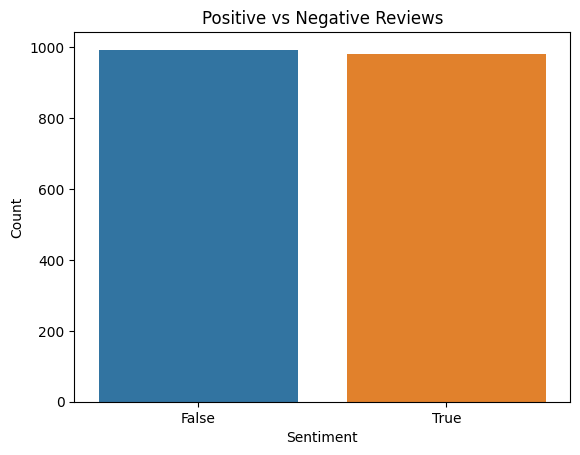

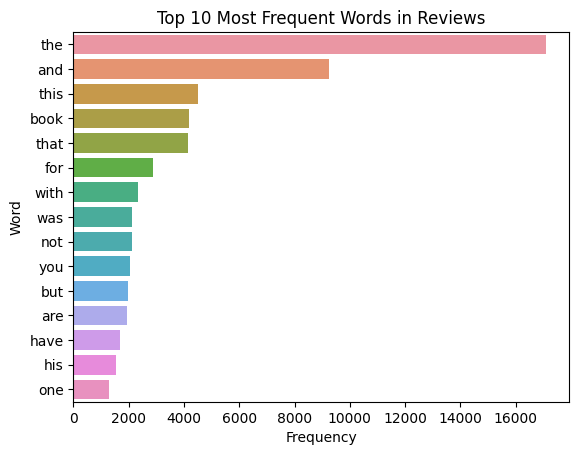

In [24]:
from collections import Counter
import re

# compare positive and negative reviews
sns.countplot(x = "Positive Review", data = df)
plt.title("Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# find word freq
words = re.findall(r'\b[a-z]{3,}\b', " ".join(df['Review'].astype(str)).lower())
word_freq = Counter(words).most_common(15)
words_df = pd.DataFrame(word_freq, columns = ["Word", "Frequency"])

# visualize the data
sns.barplot(x = "Frequency", y = "Word", data = words_df)
plt.title("Top 10 Most Frequent Words in Reviews")
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. The feature list stays the same.
2. The different data preparationi techniques that I used was check for any missing values. I also implemented the TF-IDF vectorizer to transform the text. 
3. My model is logistic regression and random forest for comparison. 
4. My plan is to train/test split the data and build a neural network by adding hidden layers and using SGD optimizer. I plan to train 35 epochs and moniter the performance using accuracy and loss.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [34]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=15000, stop_words='english', min_df=2)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

In [36]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter = 1000, random_state = 1234)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Results")
print("Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.819838056680162
              precision    recall  f1-score   support

       False       0.81      0.83      0.82       245
        True       0.83      0.81      0.82       249

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [37]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(vocabulary_size,)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.3))

nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))

nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [38]:
adam_optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 5):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = f"Epoch [{epoch + 1}/ {self.num_epochs}]"
            logs_s = [f'{k.capitalize()}: {v:.4f}' for k, v in logs.items()]
            print(', '.join([s] + logs_s))

In [40]:
num_epochs = 35
t0 = time.time()
history = nn_model.fit(
    X_train_tfidf.toarray(), y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs)]
)
t1 = time.time()
print(f"Training Time: {t1 - t0:.2f}s")

2025-07-31 03:36:04.082397: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-31 03:36:04.086708: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2650000000 Hz


Epoch [5/ 35], Loss: 0.0372, Accuracy: 0.9907, Val_loss: 0.9322, Val_accuracy: 0.7399
Epoch [10/ 35], Loss: 0.0035, Accuracy: 1.0000, Val_loss: 1.4452, Val_accuracy: 0.7534
Epoch [15/ 35], Loss: 0.0016, Accuracy: 1.0000, Val_loss: 1.6876, Val_accuracy: 0.7466
Epoch [20/ 35], Loss: 0.0013, Accuracy: 0.9992, Val_loss: 2.3126, Val_accuracy: 0.7432
Epoch [25/ 35], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 1.9965, Val_accuracy: 0.7669
Epoch [30/ 35], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 2.1450, Val_accuracy: 0.7635
Epoch [35/ 35], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 2.3961, Val_accuracy: 0.7399
Training Time: 5.32s


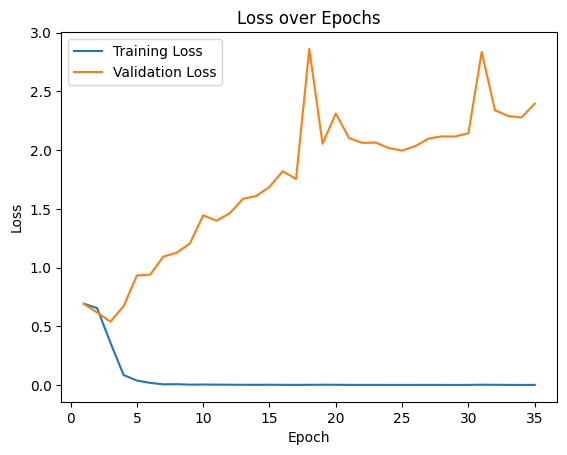

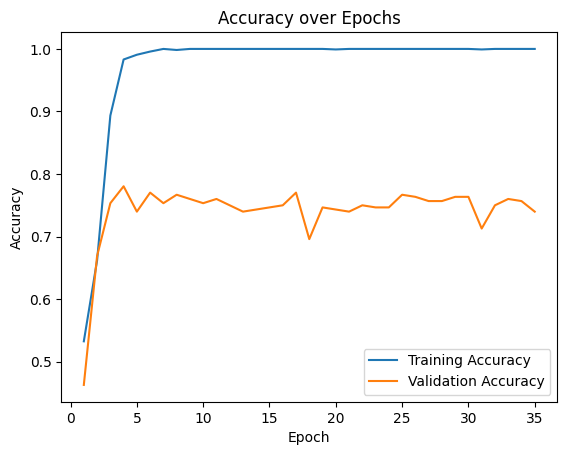

In [41]:
# Plot Loss
plt.plot(range(1, num_epochs+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs+1), history.history['val_loss'], label='Validation Loss')
plt.legend(), plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.title('Loss over Epochs')
plt.show()

# Plot Accuracy
plt.plot(range(1, num_epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(), plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.title('Accuracy over Epochs')
plt.show()

In [42]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Test Loss:', loss, 'Test Accuracy:', accuracy)


16/16 [==============================] - 0s 957us/step - loss: 2.1776 - accuracy: 0.7854
Test Loss: 2.1776044368743896 Test Accuracy: 0.7854251265525818
